In [ ]:
# Task 1A

import numpy as np
import matplotlib.pyplot as plt


def improved_euler(m_0: np.ndarray, t_inv: np.ndarray, N: int, h: float) -> np.ndarray:
    m_n = m_0
    m = [m_n]
    for n in range(N - 1):
        m_n_half = m_n + (h / 2) * (np.cross(m_n, (t_inv @ m_n)))
        m_n = m_n + h * np.cross(m_n_half, (t_inv @ m_n_half))
        m.append(m_n)
    return np.array(m, dtype=np.float64)


def momentum_error(m_0: np.ndarray, m_n: np.ndarray) -> np.float64:
    return np.abs(m_n.T @ m_n - m_0.T @ m_0)


def energy_error(m_0: np.ndarray, m_n: np.ndarray, t_inv: np.ndarray) -> np.float64:
    return np.abs(0.5 * m_n.T @ (t_inv @ m_n) - 0.5 * m_0.T @ (t_inv @ m_0))


m_0 = np.asarray([1, 0.2, 1], dtype=np.float64)
t_inv = np.linalg.inv(np.array([[1, 0, 0], [0, 4, 0], [0, 0, 9]]))
start, end = 0, 10
N = 1000
h = (end - start) / N

sol = improved_euler(m_0, t_inv, N, h)
ts = np.linspace(0, 10, num=N)

plt.plot(ts, sol[:, 0], label='First component')
plt.plot(ts, sol[:, 1], label='Second component')
plt.plot(ts, sol[:, 2], label='Third component')
plt.legend(loc='lower left')
plt.grid()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Approximation of angular momentum with Improved Euler")
plt.show()

momentum_errors = np.array([momentum_error(m_0, x) for x in sol])
plt.plot(ts, momentum_errors, label='Momentum error')
energy_errors = np.array([energy_error(m_0, x, t_inv) for x in sol])
plt.plot(ts, energy_errors, label='Energy error')
plt.legend(loc='lower left')
plt.semilogy()
plt.grid()
plt.xlabel("Time")
plt.ylabel("Absolute error")
plt.title("Error with Improved Euler")
plt.show()

[[ 0.99974518  0.20799352  0.99862319]
 [ 0.99974229  0.20808226  0.99860759]
 [ 0.99973941  0.208171    0.99859199]
 ...
 [ 0.90349987  1.10254391 -0.08991614]
 [ 0.90350125  1.10253668 -0.08999085]
 [ 0.90350263  1.10252945 -0.09006556]]
[[ 0.99974518  0.20799352  0.99862319]
 [ 0.99974229  0.20808226  0.99860759]
 [ 0.99973941  0.208171    0.99859199]
 ...
 [ 0.90349987  1.10254391 -0.08991614]
 [ 0.90350125  1.10253668 -0.08999085]
 [ 0.90350263  1.10252945 -0.09006556]]


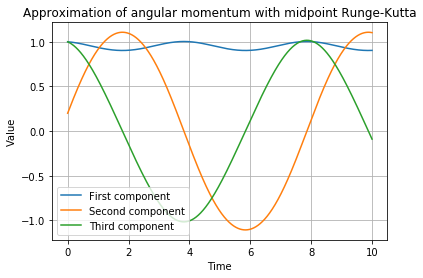

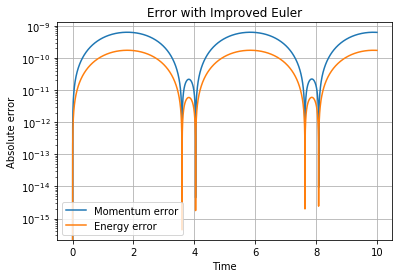

In [31]:
# Task 1B

from numpy.linalg import norm


def fixed_point_iteration(x_0: np.ndarray, func, tol: np.float64, max_iter: np.int64) -> np.ndarray:
    x_n = x_0
    for iter in range(max_iter):
        next_x = func(x_n)
        if norm(next_x - x_n) <= tol:
            x_n = next_x
            break
        x_n = next_x
    return x_n


def runge_kutta(m_0: np.ndarray, t_inv: np.ndarray, N: int, h: float) -> np.ndarray:
    m_n = m_0
    m = [m_n]
    f_n_half = lambda x: m_n + (h / 2) * (np.cross(m_n, (t_inv @ m_n)))
    for n in range(N - 1):
        m_n_half = fixed_point_iteration(m_n, f_n_half, np.float64(1e-15), 100)
        #m_n_half = m_n + (h / 2) * (np.cross(m_n, (t_inv @ m_n)))
        m_n = m_n + h * np.cross(m_n_half, (t_inv @ m_n_half))
        m.append(m_n)
    return np.array(m, dtype=np.float64)


sol = runge_kutta(m_0, t_inv, N, h)

plt.plot(ts, sol[:, 0], label='First component')
plt.plot(ts, sol[:, 1], label='Second component')
plt.plot(ts, sol[:, 2], label='Third component')
plt.legend(loc='lower left')
plt.grid()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Approximation of angular momentum with midpoint Runge-Kutta")
plt.show()

momentum_errors = np.array([momentum_error(m_0, x) for x in sol])
plt.plot(ts, momentum_errors, label='Momentum error')
energy_errors = np.array([energy_error(m_0, x, t_inv) for x in sol])
plt.plot(ts, energy_errors, label='Energy error')
plt.legend(loc='lower left')
plt.semilogy()
plt.grid()
plt.xlabel("Time")
plt.ylabel("Absolute error")
plt.title("Error with midpoint Runge-Kutta")
plt.show()

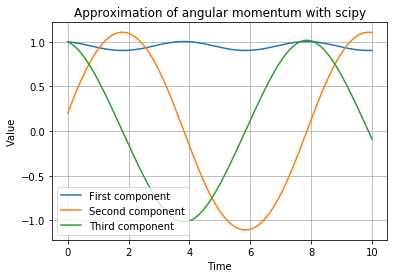

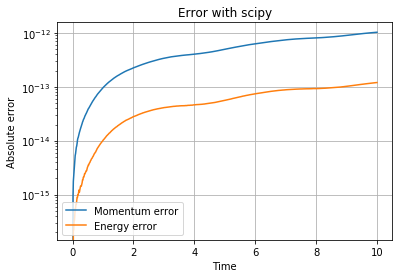

In [3]:
# Task 1C

from scipy.integrate import solve_ivp

# 1.

fun = lambda t, x: np.cross(x, t_inv @ x)
sol_ivp = solve_ivp(fun, (start, end), m_0, atol=1e-13, rtol=1e-13)
ts = sol_ivp.t
sol = sol_ivp.y.T

plt.plot(ts, sol[:, 0], label='First component')
plt.plot(ts, sol[:, 1], label='Second component')
plt.plot(ts, sol[:, 2], label='Third component')
plt.legend(loc='lower left')
plt.grid()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Approximation of angular momentum with scipy")
plt.show()